## Linear Algorithm

Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Import testing data

Read csv file and generate correlation matrix between variables

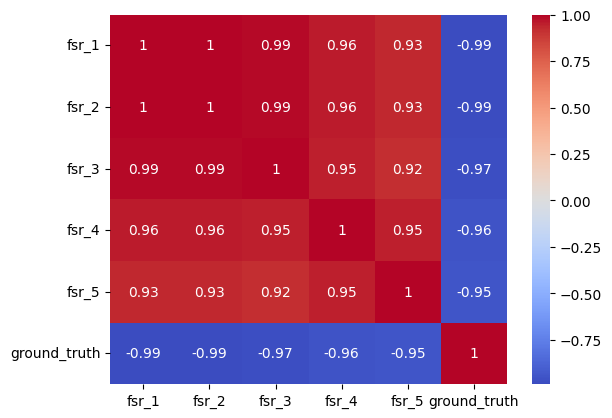

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/SEF 2023-2024/TinyML/interlink_linear.csv')

# Split data into features (X) and target (y)
X = df[['fsr_1', 'fsr_2','fsr_3','fsr_4','fsr_5']]
y = df['ground_truth']

df.head()
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

save_path = '/content/drive/MyDrive/SEF 2023-2024/TinyML/Performance/RFC_model/final/linear_heat_nomotion.png'
plt.savefig(save_path)

plt.show()

## Generate testing data

Generate linear correlation statistics based of data

In [7]:
import statsmodels.api as sm

X = df[['fsr_1', 'fsr_2', 'fsr_3', 'fsr_4', 'fsr_5']]
X = sm.add_constant(X)  # Add a constant term for the intercepts

y = df['ground_truth']

model = sm.OLS(y, X).fit()
print(model.summary()) # generate report of stats between data

                            OLS Regression Results                            
Dep. Variable:           ground_truth   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     4309.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          1.15e-320
Time:                        04:09:17   Log-Likelihood:                -788.06
No. Observations:                 369   AIC:                             1588.
Df Residuals:                     363   BIC:                             1612.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.8759      0.610    114.569      0.0

Linear prediction algorithm and related performance in accuracy and precision

In [15]:
# Assuming you have loaded your data into the DataFrame 'df'
# Assuming you have the linear regression coefficients available

# Calculate predictions using the specified equation
predictions = (
  (
   df['fsr_1'] +
   df['fsr_2'] +
   df['fsr_3'] +
   df['fsr_4'] +
   df['fsr_5'])
  / 5
)

# Apply the threshold
threshold = 1665.979447
binary_predictions = (df['predictions'] < threshold)

# Add predictions to the DataFrame
df['predictions'] = binary_predictions.astype(int)

# Display the DataFrame with predictions
print(df[['fsr_1', 'fsr_2', 'fsr_3', 'fsr_4', 'fsr_5', 'ground_truth', 'predictions']])

# Calculate accuracy
accuracy = sum(df['predictions'] == df['ground_truth']) / len(df)

# Calculate precision
true_positives = sum((df['predictions'] == 1) & (df['ground_truth'] == 1))
false_positives = sum((df['predictions'] == 1) & (df['ground_truth'] == 0))
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

# Display results
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")

        fsr_1     fsr_2     fsr_3     fsr_4     fsr_5  ground_truth  \
0    6.558105  6.925488  7.444336  9.390820  8.098535             0   
1    6.616113  7.035059  7.337988  9.406934  7.753711             0   
2    6.596777  7.060840  7.483008  9.313477  8.807520             0   
3    6.661230  6.867480  7.495898  9.571289  7.776270             0   
4    6.493652  6.983496  7.386328  9.329590  9.435937             0   
..        ...       ...       ...       ...       ...           ...   
364  1.856250  1.646777  1.495312  1.414746  1.240723            50   
365  2.056055  1.585547  1.495312  1.289062  1.279395            50   
366  1.901367  1.620996  1.466309  1.614551  1.179492            50   
367  1.885254  1.624219  1.495312  1.595215  1.247168            50   
368  1.843359  1.575879  1.495312  1.434082  1.185937            50   

     predictions  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
364           

## Convert voltage readings to mmHG

In [8]:
# Calculate the average FSR reading from the DataFrame
df['fsr_1'] = (df['fsr_1'] / 1024) * 3.3
df['fsr_2'] = (df['fsr_2'] / 1024) * 3.3
df['fsr_3'] = (df['fsr_3'] / 1024) * 3.3
df['fsr_4'] = (df['fsr_4'] / 1024) * 3.3
df['fsr_5'] = (df['fsr_5'] / 1024) * 3.3

average_fsr_reading = (df['fsr_1'] + df['fsr_2'] + df['fsr_3'] + df['fsr_4'] + df['fsr_5']) / 5

# Calculate FSR resistance in ohm based on the Arduino code logic
fsr_resistance = ((5000 - average_fsr_reading) * 10000) / average_fsr_reading

# Calculate FSR conductance based on the Arduino code logic
fsr_conductance = 1000000 / fsr_resistance

if (fsr_conductance.all() <= 1000):
  fsr_force = fsr_conductance / 80
else:
  fsr_force = (fsr_conductance - 1000) / 30

# Convert conductance to mmHG
fsr_mmHG = 0.0075006157584566 * fsr_force

# Use threshold values to create binary predictions
threshold = 30
binary_predictions = threshold > threshold

# Add predictions to the DataFrame
df['predictions'] = binary_predictions.astype(int)

# Display the DataFrame with predictions
print(df[['fsr_1', 'fsr_2', 'fsr_3', 'fsr_4', 'fsr_5', 'ground_truth', 'predictions']])

# Calculate accuracy
accuracy = sum(df['predictions'] == df['ground_truth']) / len(df)

# Calculate precision
true_positives = sum((df['predictions'] == 1) & (df['ground_truth'] == 1))
false_positives = sum((df['predictions'] == 1) & (df['ground_truth'] == 0))
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

# Display results
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(fsr_mmHG)

AttributeError: 'bool' object has no attribute 'astype'